<a href="https://colab.research.google.com/github/Zardian18/PixelCNN_Anime_Characters_Faces/blob/master/PixelCNN_Anime_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Anime Faces with PixelCNN++

## Getting the data

In [1]:
!wget https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py

--2024-01-19 03:45:08--  https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17171 (17K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  16.77K  --.-KB/s    in 0.001s  

2024-01-19 03:45:08 (23.7 MB/s) - ‘helper.py’ saved [17171/17171]



In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount("/content/drive")

! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [4]:
! kaggle datasets download -d splcher/animefacedataset

100% 395M/395M [00:04<00:00, 117MB/s]
100% 395M/395M [00:04<00:00, 94.6MB/s]


In [ ]:
! unzip animefacedataset.zip

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, utils, metrics, losses, optimizers
from helper import sample_batch, display
import pandas as pd
import numpy as np
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

In [7]:
train_data = utils.image_dataset_from_directory(
    "/content/images",
    labels= None,
    color_mode= "rgb",
    image_size=(32,32),
    batch_size=64,
    shuffle = True,
    seed=42,
    interpolation= "bilinear"
)
train_data

Found 63565 files belonging to 1 classes.


<_PrefetchDataset element_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None)>

In [ ]:
def preprocess(imgs):
  imgs = tf.cast(imgs, "float32")/255.0
  return imgs

train = train_data.map(lambda x: preprocess(x))

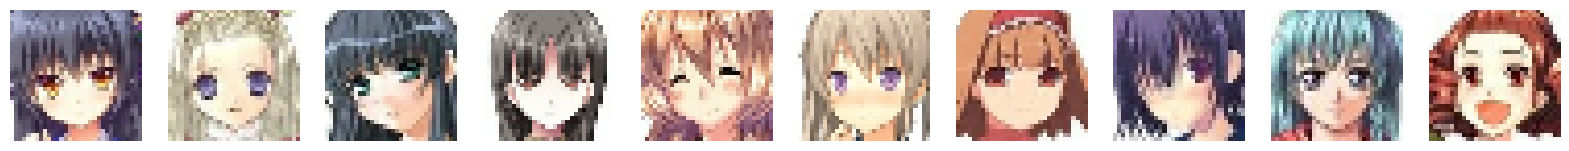

In [16]:
display(sample_batch(train_data))

In [11]:
dist = tfp.distributions.PixelCNN(
    image_shape=(32,32,3),
    num_resnet = 2,
    num_hierarchies =2,
    num_filters = 32,
    num_logistic_mix = 10,
    dropout_p =0.5
)

image_input = layers.Input(shape=(32,32,3))
log_prob = dist.log_prob(image_input)

pixelcnn = models.Model(image_input, log_prob)
pixelcnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 tf.reshape_1 (TFOpLambda)   (None, 32, 32, 3)            0         ['input_2[0][0]']             
                                                                                                  
 tf.math.subtract (TFOpLamb  (None, 32, 32, 3)            0         ['tf.reshape_1[0][0]']        
 da)                                                                                              
                                                                                                  
 tf.math.multiply (TFOpLamb  (None, 32, 32, 3)            0         ['tf.math.subtract[0][0]

In [12]:
pixelcnn.add_loss(-tf.reduce_mean(log_prob))
pixelcnn.compile(
    optimizer=optimizers.Adam(0.001),
)

In [18]:
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")


class ImageGenerator(callbacks.Callback):
    def __init__(self, num_img):
        self.num_img = num_img

    def generate(self):
        return dist.sample(self.num_img).numpy()

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.generate()
        display(
            generated_images,
            n=self.num_img,
            save_to="./output/generated_img_%03d.png" % (epoch),
        )


img_generator_callback = ImageGenerator(num_img=4)

In [14]:
!mkdir output/

Layer _PixelCNNNetwork was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/50
  6/994 [..............................] - ETA: 3:30 - loss: 22449.1875

994/994 [==============================] - ETA: 0s - loss: 13780.6123
Saved to ./output/generated_img_000.png


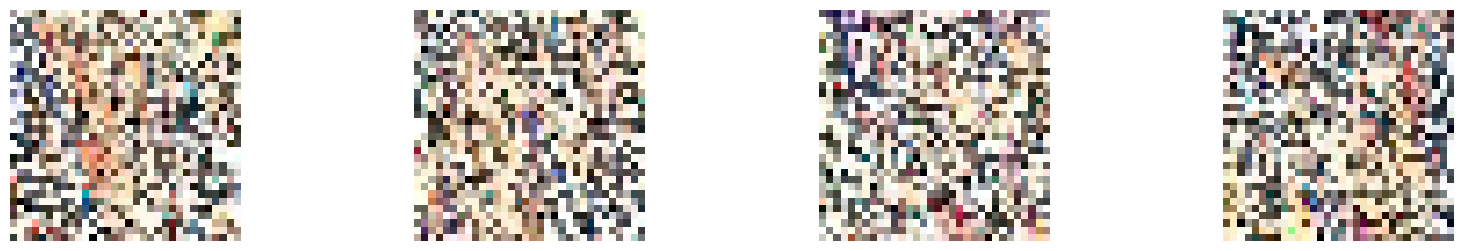

994/994 [==============================] - 393s 394ms/step - loss: 13780.6123
Epoch 2/50
994/994 [==============================] - ETA: 0s - loss: 12215.3506
Saved to ./output/generated_img_001.png


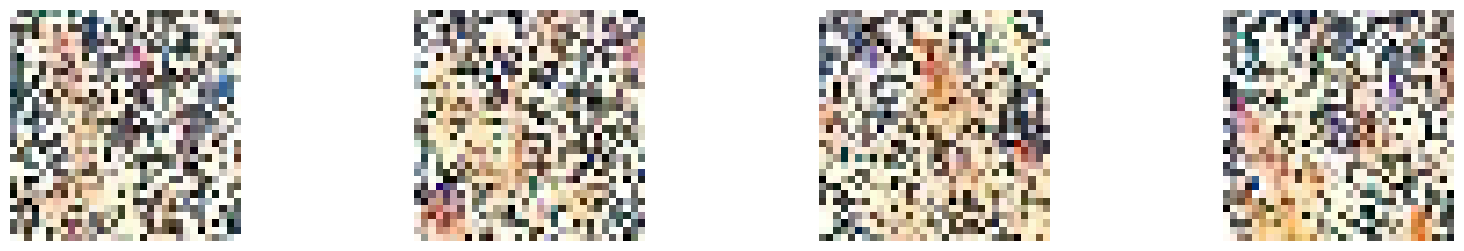

994/994 [==============================] - 390s 392ms/step - loss: 12215.3506
Epoch 3/50
994/994 [==============================] - ETA: 0s - loss: 11619.3955
Saved to ./output/generated_img_002.png


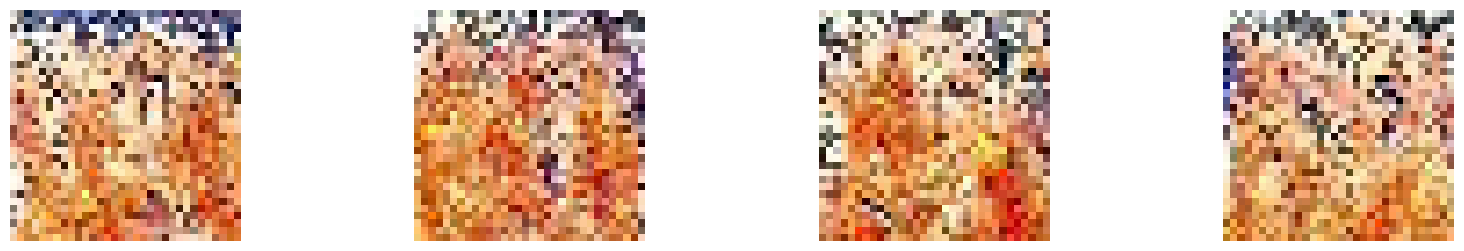

994/994 [==============================] - 387s 389ms/step - loss: 11619.3955
Epoch 4/50
994/994 [==============================] - ETA: 0s - loss: 11392.1396
Saved to ./output/generated_img_003.png


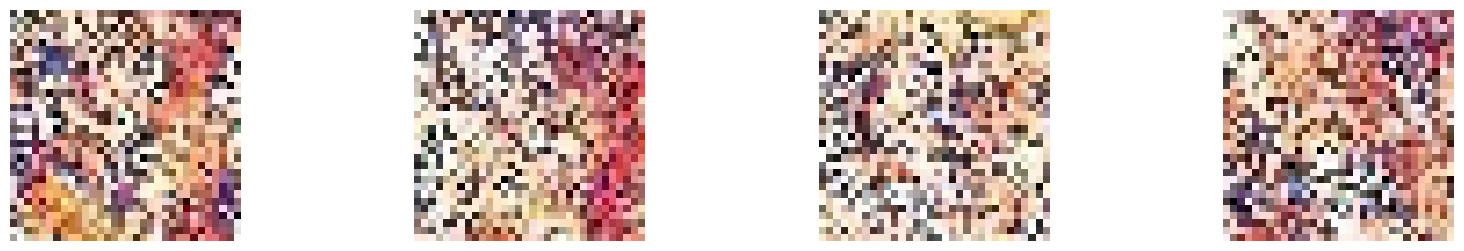

994/994 [==============================] - 388s 391ms/step - loss: 11392.1396
Epoch 5/50
994/994 [==============================] - ETA: 0s - loss: 11291.0303
Saved to ./output/generated_img_004.png


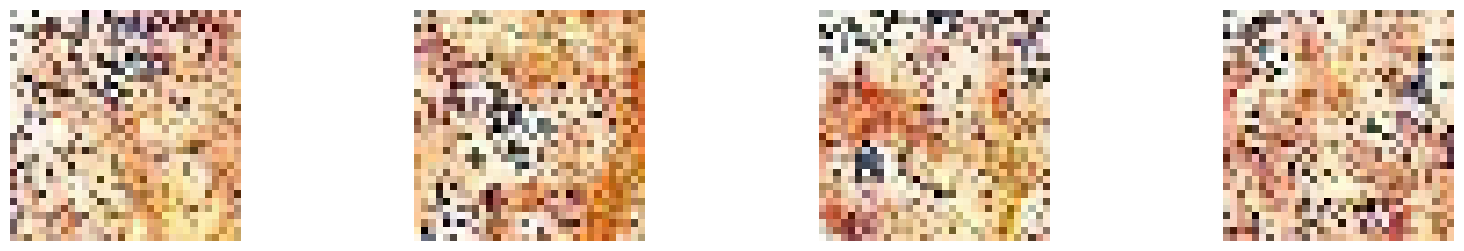

994/994 [==============================] - 389s 391ms/step - loss: 11291.0303
Epoch 6/50
994/994 [==============================] - ETA: 0s - loss: 10781.2227
Saved to ./output/generated_img_005.png


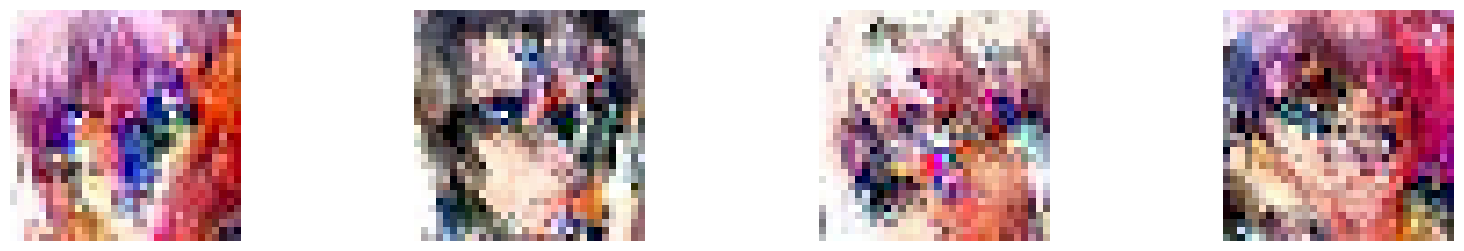

994/994 [==============================] - 388s 391ms/step - loss: 10781.2227
Epoch 7/50
994/994 [==============================] - ETA: 0s - loss: 10213.7031
Saved to ./output/generated_img_006.png


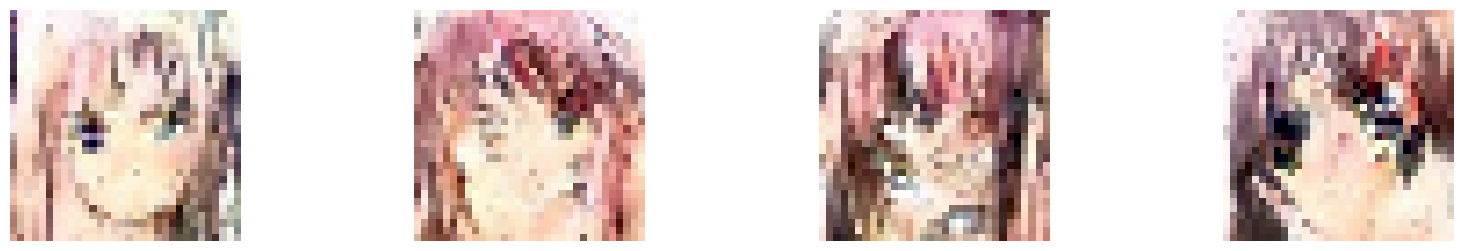

994/994 [==============================] - 389s 391ms/step - loss: 10213.7031
Epoch 8/50
994/994 [==============================] - ETA: 0s - loss: 10084.9619
Saved to ./output/generated_img_007.png


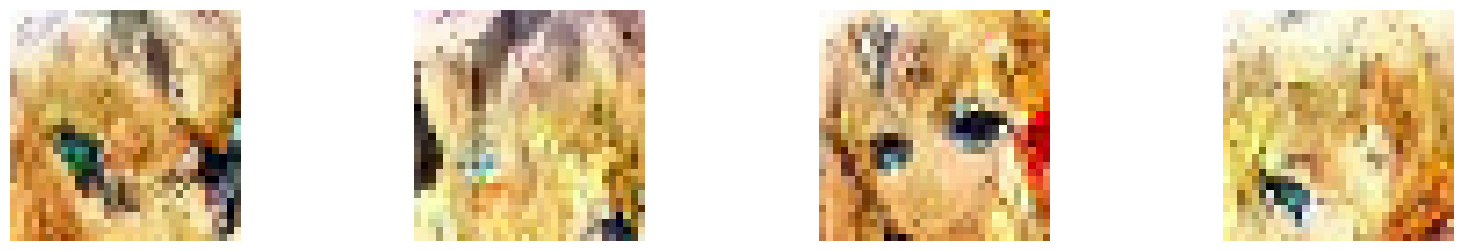

994/994 [==============================] - 393s 395ms/step - loss: 10084.9619
Epoch 9/50
994/994 [==============================] - ETA: 0s - loss: 10018.5283
Saved to ./output/generated_img_008.png


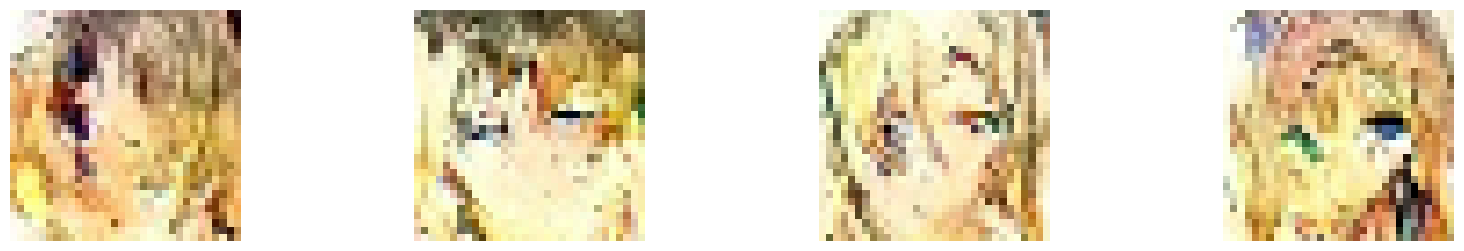

994/994 [==============================] - 390s 392ms/step - loss: 10018.5283
Epoch 10/50
994/994 [==============================] - ETA: 0s - loss: 9964.3184
Saved to ./output/generated_img_009.png


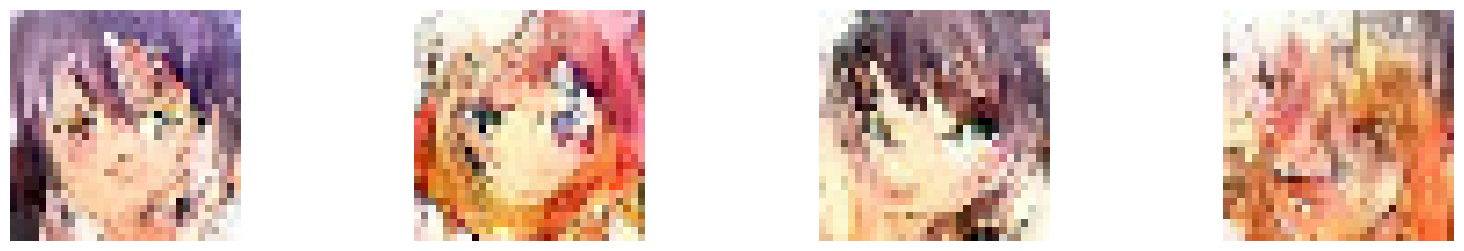

994/994 [==============================] - 391s 394ms/step - loss: 9964.3184
Epoch 11/50
994/994 [==============================] - ETA: 0s - loss: 9912.1484
Saved to ./output/generated_img_010.png


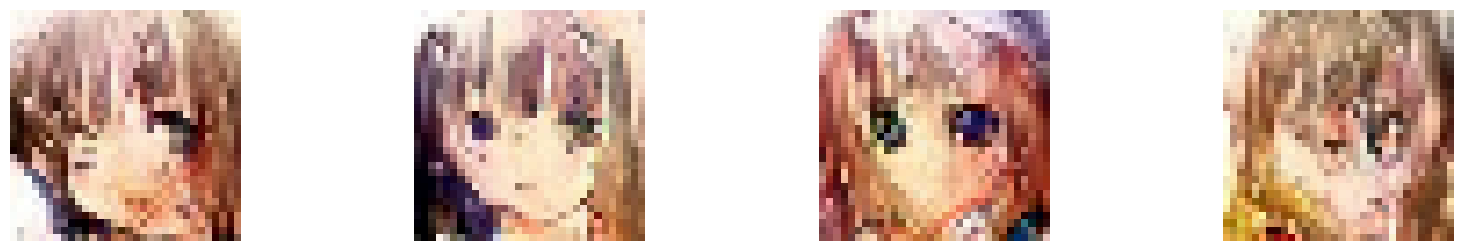

994/994 [==============================] - 396s 399ms/step - loss: 9912.1484
Epoch 12/50
994/994 [==============================] - ETA: 0s - loss: 9869.9072
Saved to ./output/generated_img_011.png


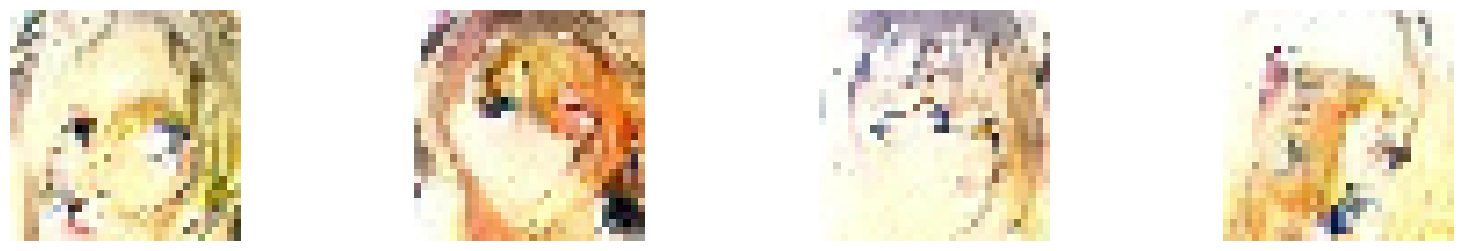

994/994 [==============================] - 396s 399ms/step - loss: 9869.9072
Epoch 13/50
994/994 [==============================] - ETA: 0s - loss: 9835.8174
Saved to ./output/generated_img_012.png


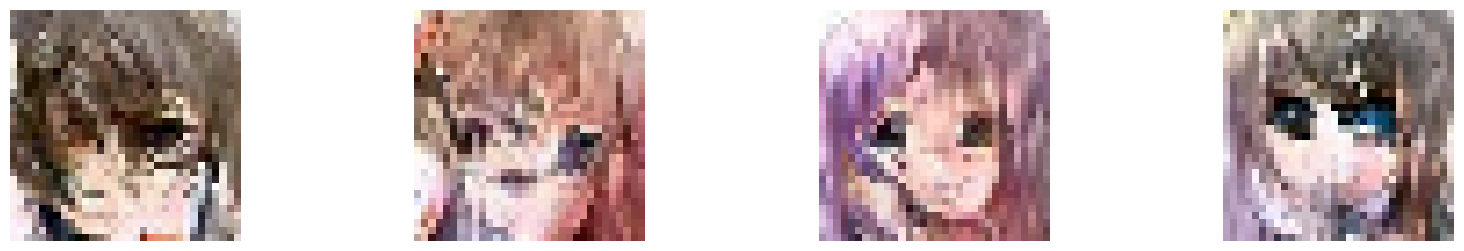

994/994 [==============================] - 394s 396ms/step - loss: 9835.8174
Epoch 14/50
994/994 [==============================] - ETA: 0s - loss: 9802.7061
Saved to ./output/generated_img_013.png


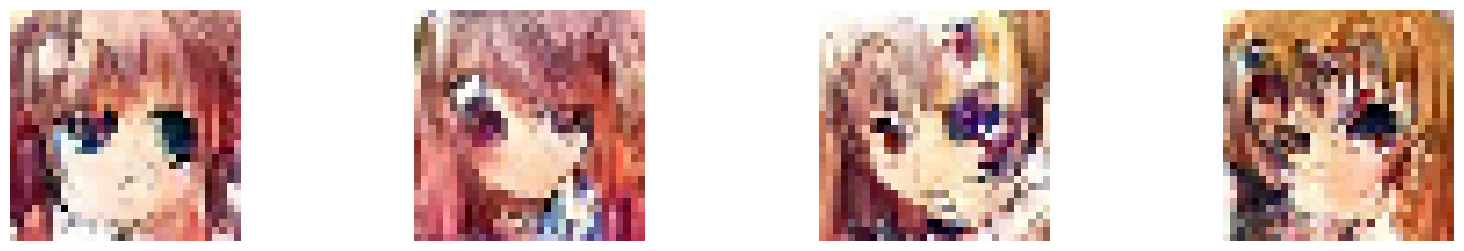

994/994 [==============================] - 401s 403ms/step - loss: 9802.7061
Epoch 15/50
994/994 [==============================] - ETA: 0s - loss: 9774.9141
Saved to ./output/generated_img_014.png


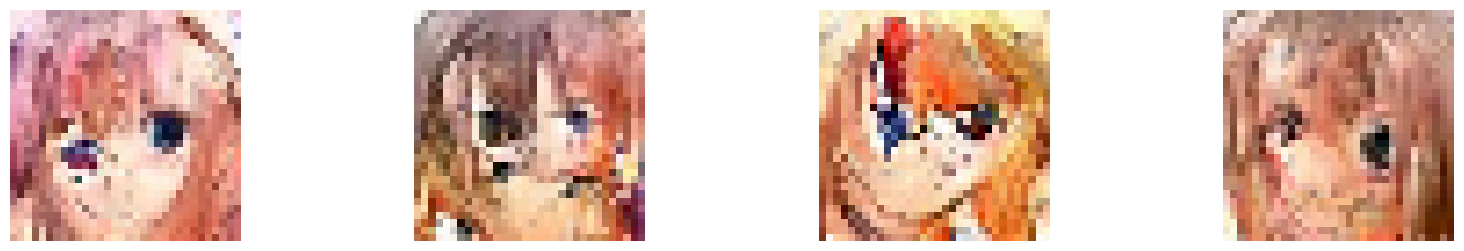

994/994 [==============================] - 404s 407ms/step - loss: 9774.9141
Epoch 16/50
994/994 [==============================] - ETA: 0s - loss: 9753.6221
Saved to ./output/generated_img_015.png


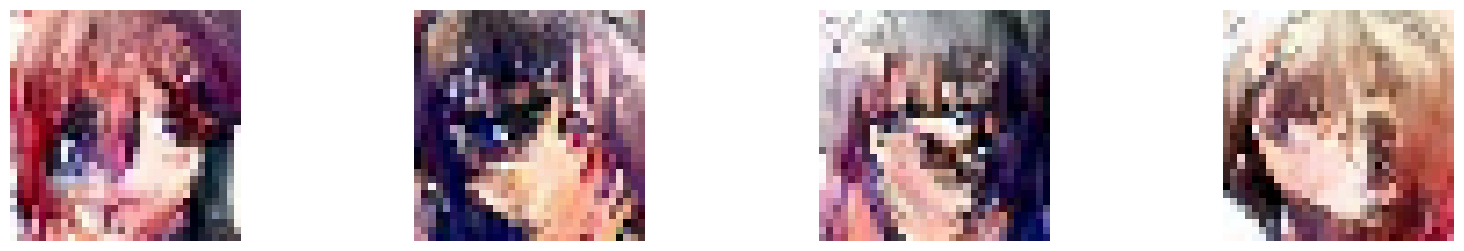

994/994 [==============================] - 395s 398ms/step - loss: 9753.6221
Epoch 17/50
994/994 [==============================] - ETA: 0s - loss: 9733.0273
Saved to ./output/generated_img_016.png


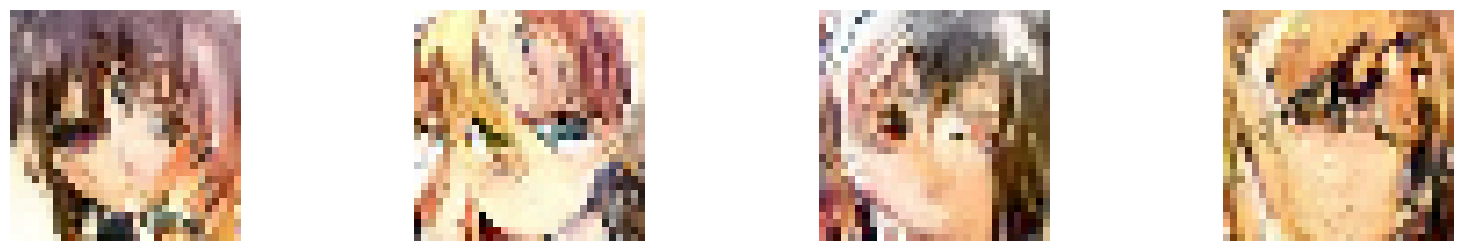

994/994 [==============================] - 392s 394ms/step - loss: 9733.0273
Epoch 18/50
994/994 [==============================] - ETA: 0s - loss: 9720.6426
Saved to ./output/generated_img_017.png


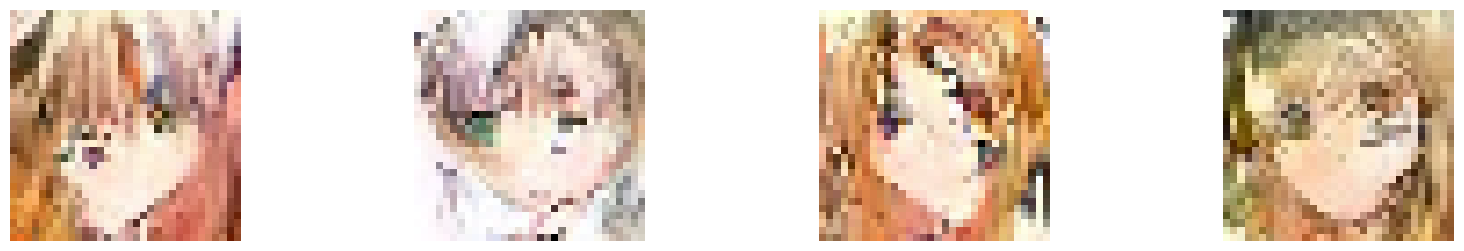

994/994 [==============================] - 393s 395ms/step - loss: 9720.6426
Epoch 19/50
994/994 [==============================] - ETA: 0s - loss: 9704.2588
Saved to ./output/generated_img_018.png


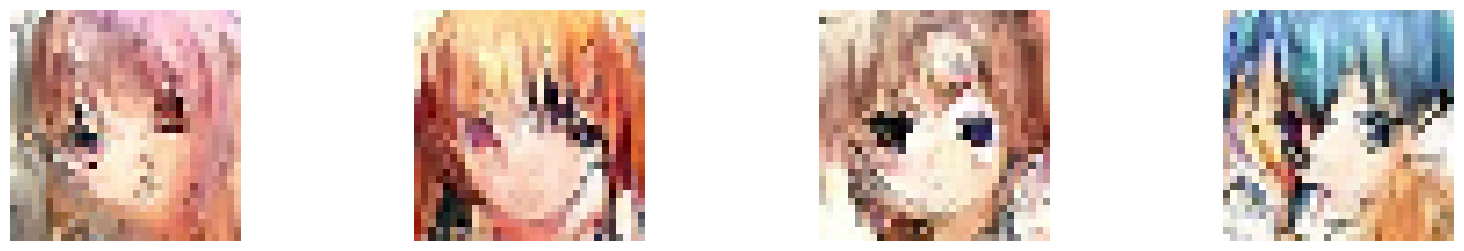

994/994 [==============================] - 395s 398ms/step - loss: 9704.2588
Epoch 20/50
994/994 [==============================] - ETA: 0s - loss: 9688.9453
Saved to ./output/generated_img_019.png


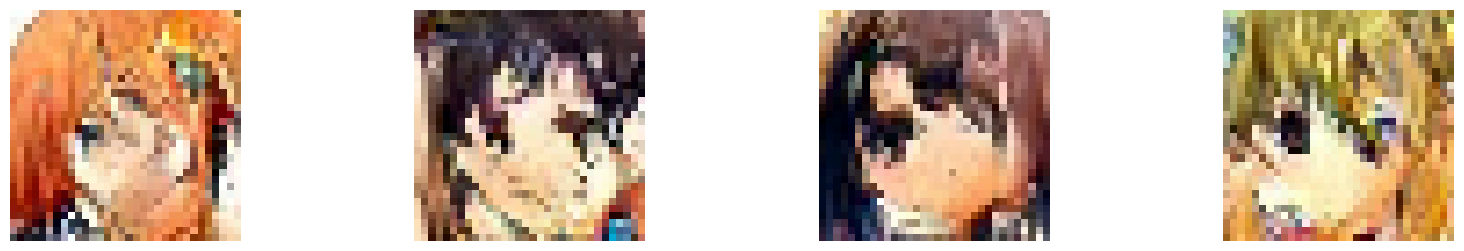

994/994 [==============================] - 391s 394ms/step - loss: 9688.9453
Epoch 21/50
994/994 [==============================] - ETA: 0s - loss: 9676.5391
Saved to ./output/generated_img_020.png


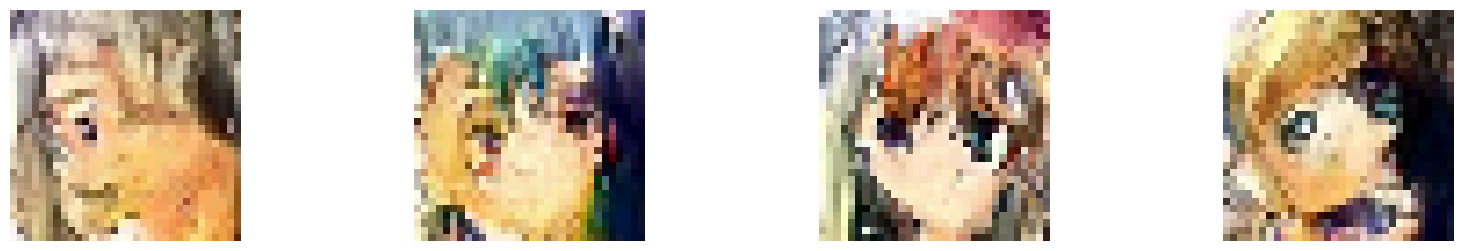

994/994 [==============================] - 393s 395ms/step - loss: 9676.5391
Epoch 22/50
994/994 [==============================] - ETA: 0s - loss: 9664.9453
Saved to ./output/generated_img_021.png


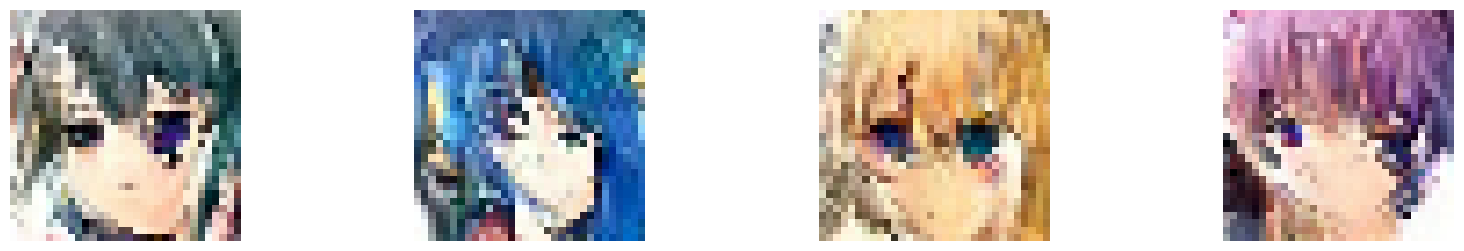

994/994 [==============================] - 450s 453ms/step - loss: 9664.9453
Epoch 23/50
994/994 [==============================] - ETA: 0s - loss: 9655.3975
Saved to ./output/generated_img_022.png


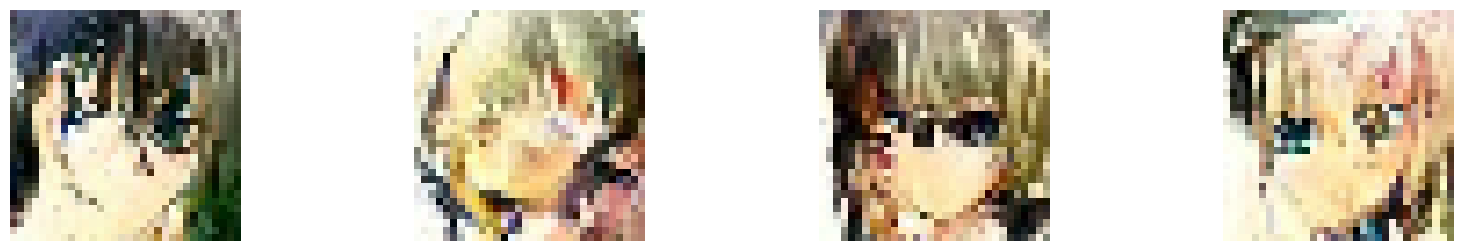

994/994 [==============================] - 435s 437ms/step - loss: 9655.3975
Epoch 24/50
994/994 [==============================] - ETA: 0s - loss: 9646.1758
Saved to ./output/generated_img_023.png


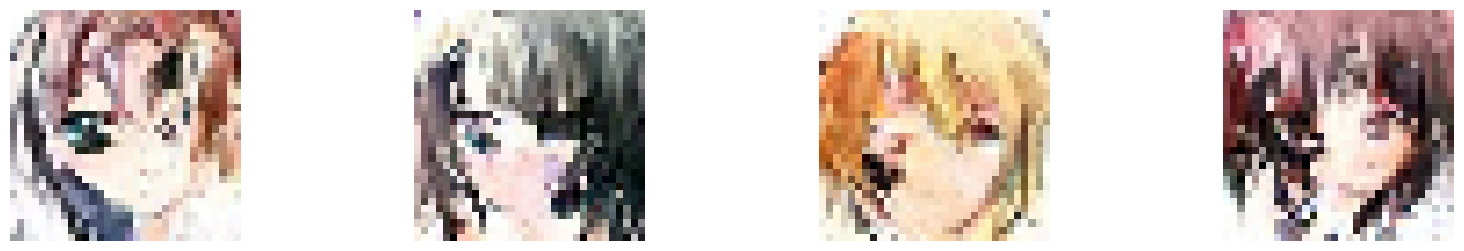

994/994 [==============================] - 442s 445ms/step - loss: 9646.1758
Epoch 25/50
994/994 [==============================] - ETA: 0s - loss: 9640.0801
Saved to ./output/generated_img_024.png


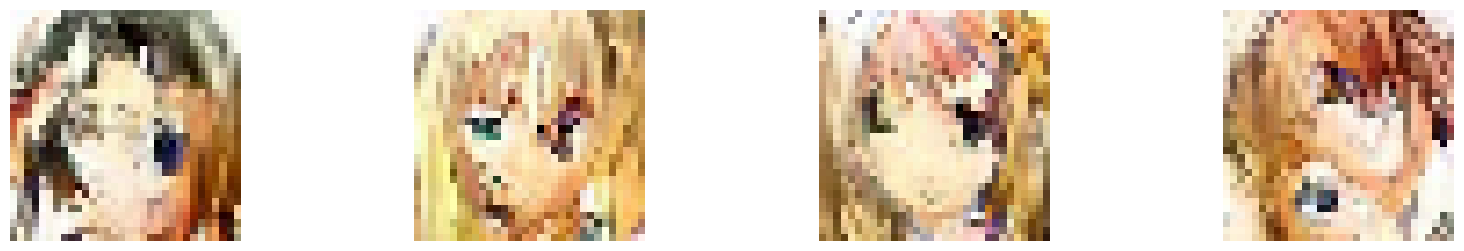

994/994 [==============================] - 436s 439ms/step - loss: 9640.0801
Epoch 26/50
994/994 [==============================] - ETA: 0s - loss: 9629.5371
Saved to ./output/generated_img_025.png


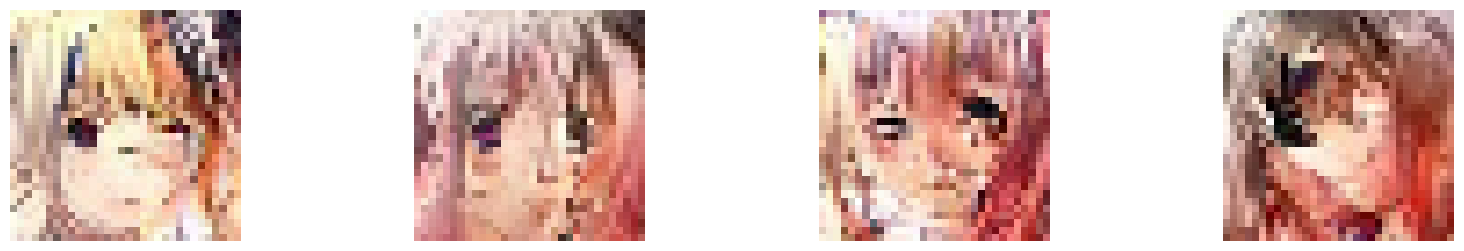

994/994 [==============================] - 431s 434ms/step - loss: 9629.5371
Epoch 27/50
994/994 [==============================] - ETA: 0s - loss: 9619.8193
Saved to ./output/generated_img_026.png


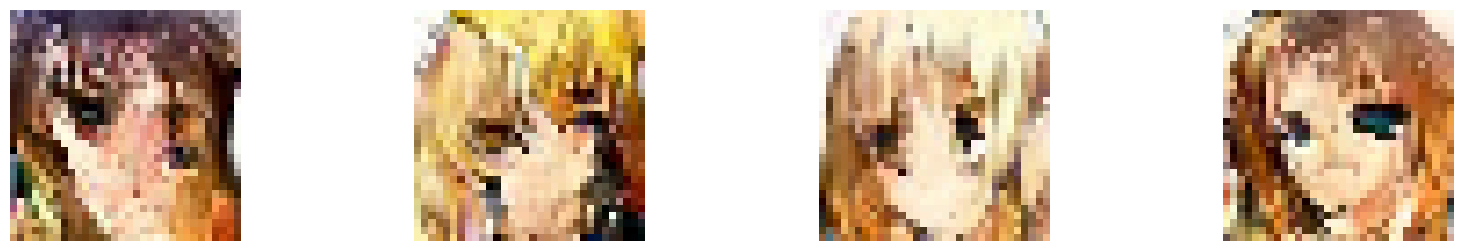

994/994 [==============================] - 433s 435ms/step - loss: 9619.8193
Epoch 28/50
994/994 [==============================] - ETA: 0s - loss: 9619.1543
Saved to ./output/generated_img_027.png


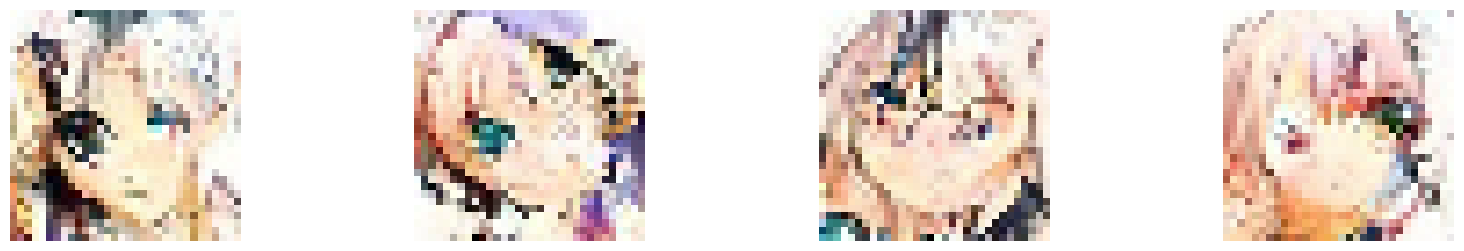

994/994 [==============================] - 425s 428ms/step - loss: 9619.1543
Epoch 29/50
994/994 [==============================] - ETA: 0s - loss: 9611.9971
Saved to ./output/generated_img_028.png


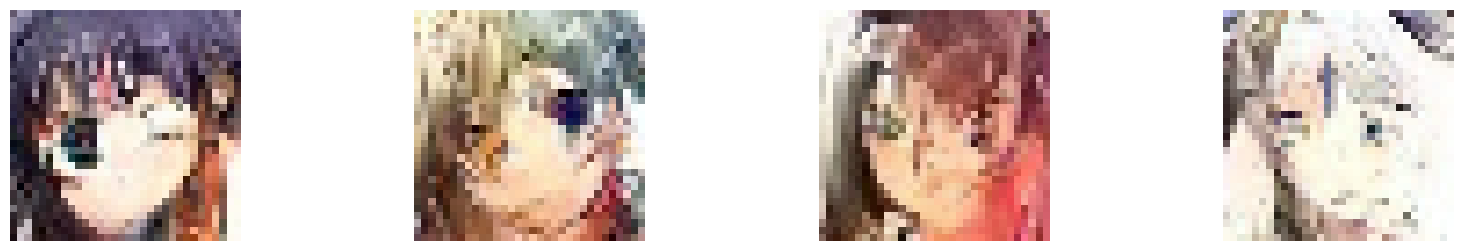

994/994 [==============================] - 425s 428ms/step - loss: 9611.9971
Epoch 30/50
994/994 [==============================] - ETA: 0s - loss: 9606.1182
Saved to ./output/generated_img_029.png


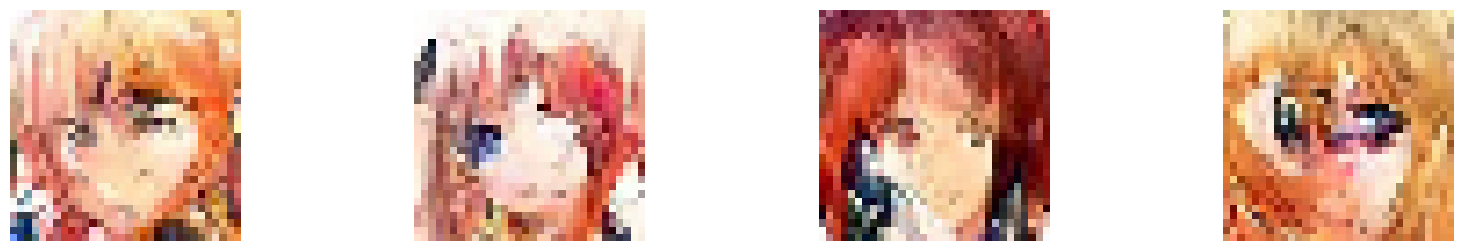

994/994 [==============================] - 429s 431ms/step - loss: 9606.1182
Epoch 31/50
994/994 [==============================] - ETA: 0s - loss: 9595.3799
Saved to ./output/generated_img_030.png


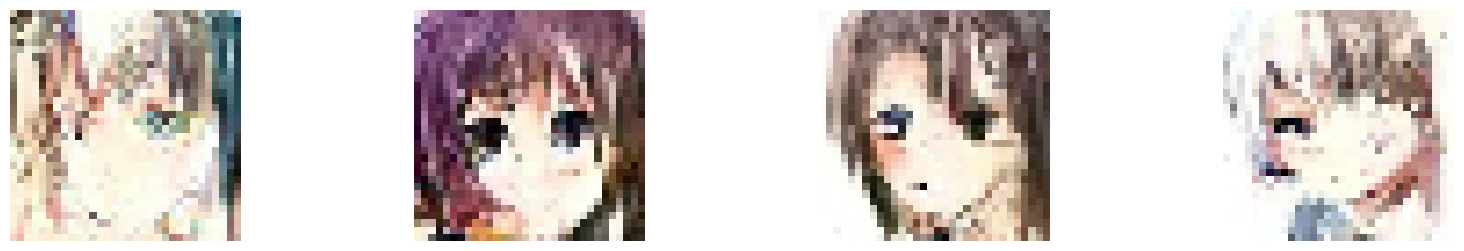

994/994 [==============================] - 427s 430ms/step - loss: 9595.3799
Epoch 32/50
994/994 [==============================] - ETA: 0s - loss: 9597.8730
Saved to ./output/generated_img_031.png


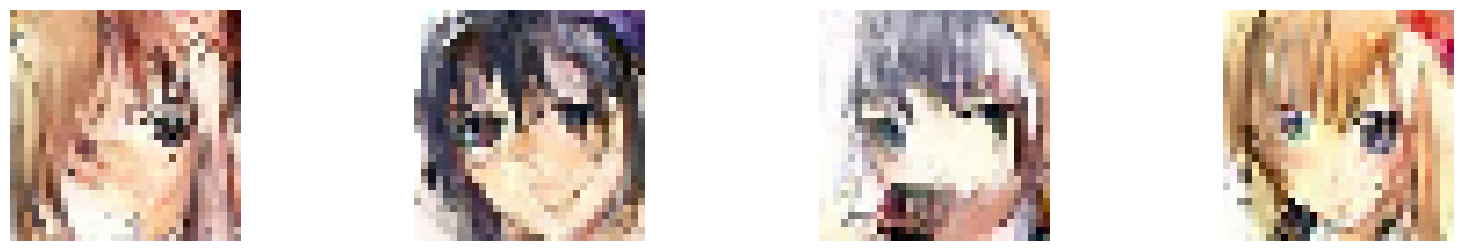

994/994 [==============================] - 389s 391ms/step - loss: 9597.8730
Epoch 33/50
994/994 [==============================] - ETA: 0s - loss: 9586.2471
Saved to ./output/generated_img_032.png


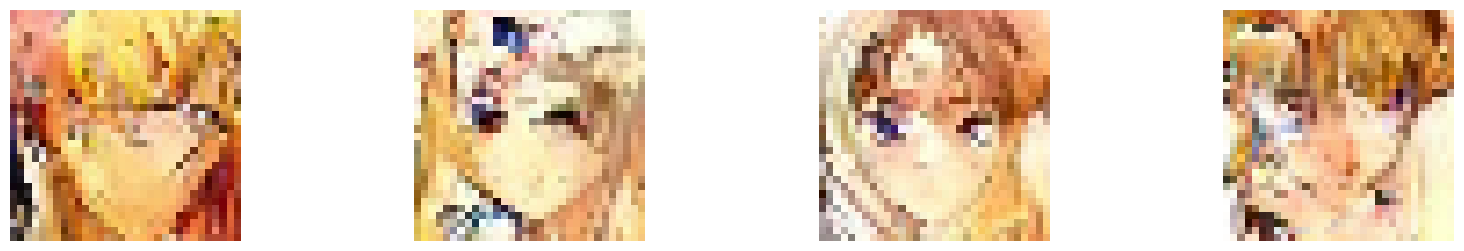

994/994 [==============================] - 401s 404ms/step - loss: 9586.2471
Epoch 34/50
994/994 [==============================] - ETA: 0s - loss: 9584.1357
Saved to ./output/generated_img_033.png


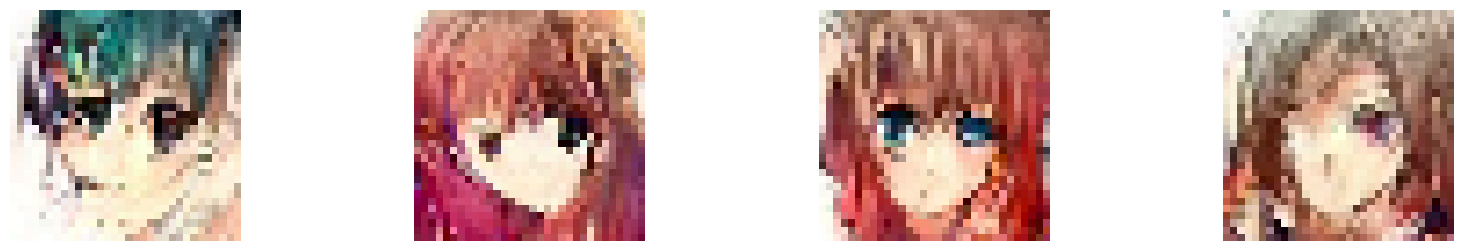

994/994 [==============================] - 405s 408ms/step - loss: 9584.1357
Epoch 35/50
 24/994 [..............................] - ETA: 3:23 - loss: 9623.0205

KeyboardInterrupt: 

In [20]:
pixelcnn.fit(
    train_data,
    batch_size=64,
    epochs=50,
    verbose=True,
    callbacks=[tensorboard_callback, img_generator_callback],
)

Stopped early because of time

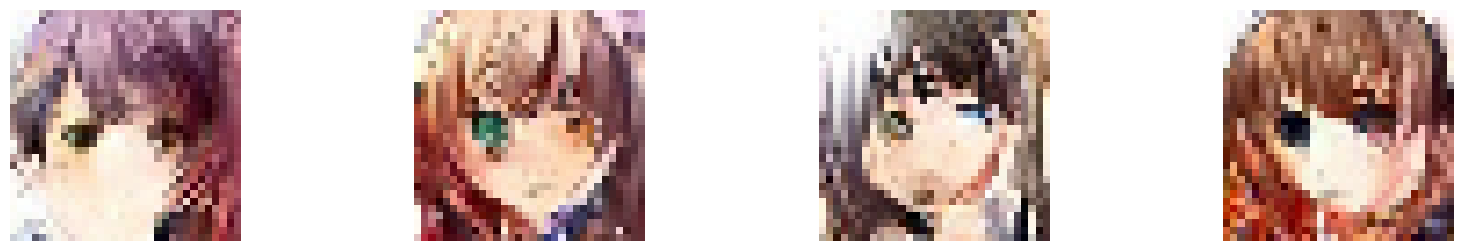

In [21]:
generated_images = img_generator_callback.generate()
display(generated_images, n=img_generator_callback.num_img)

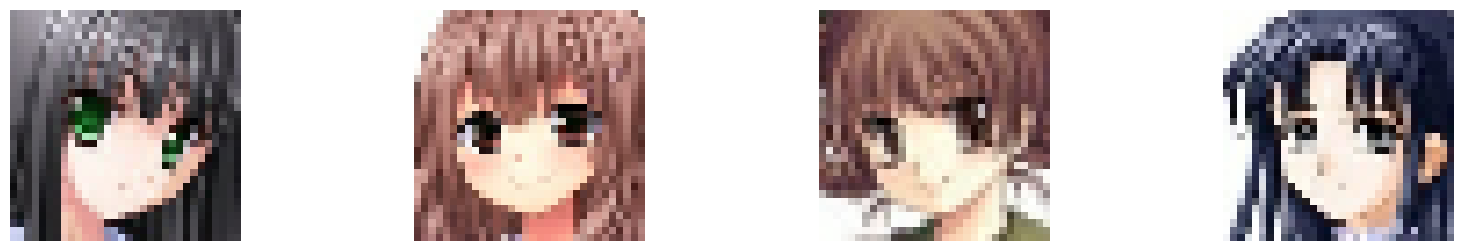

In [29]:
display(sample_batch(train_data), n=4)

In [23]:
pixelcnn.save_weights("/content/drive/MyDrive/Models_genai/pixelcnn_anime/")

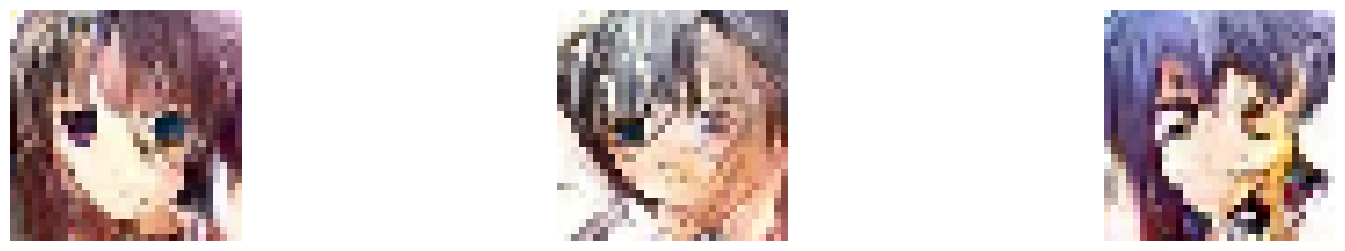

In [24]:
generated_images = img_generator_callback.generate()
display(generated_images, n=3)

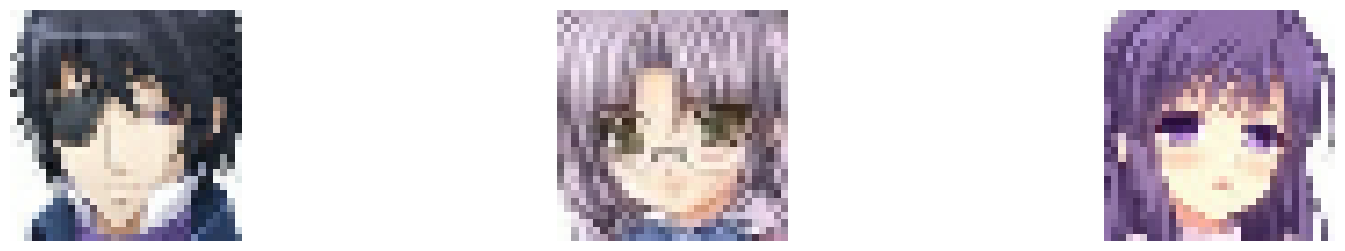

In [30]:
display(sample_batch(train_data), n=3)

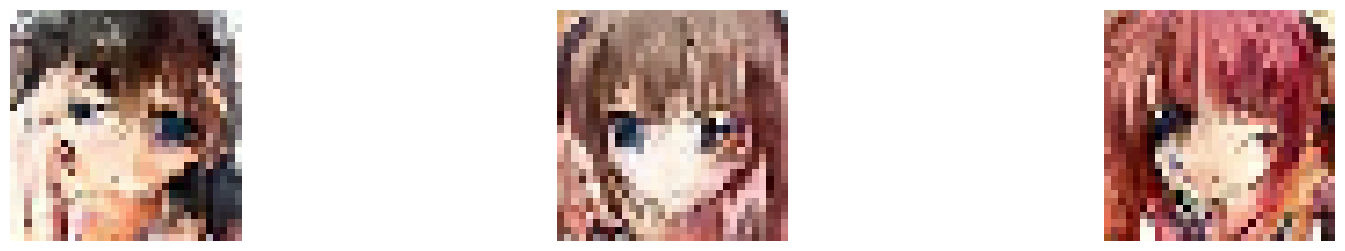

In [31]:
generated_images = img_generator_callback.generate()
display(generated_images, n=3)

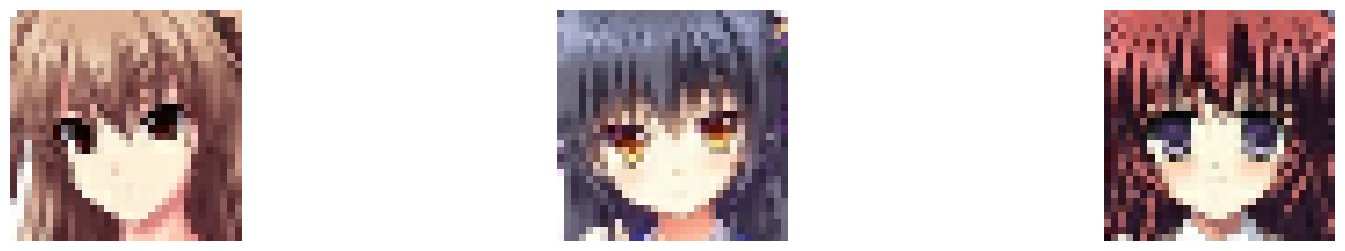

In [32]:
display(sample_batch(train_data), n=3)